In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

## **Importing the mnist dataset and printing its shape**

In [22]:

(train_img, train_lbl),(test_img, test_lbl) = tf.keras.datasets.mnist.load_data()

print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape,test_lbl.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28) (10000,)


## **Normalisation**

In [23]:
gray_scale = 255

train_img = train_img.astype('float32') / gray_scale
test_img = test_img.astype('float32') / gray_scale

## **First 100 Images**

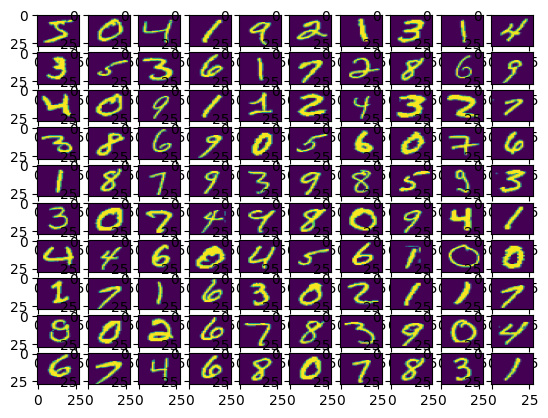

In [24]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(train_img[k].reshape(28, 28), aspect='auto',)
        k += 1
plt.show()

---
# **Defining the model - with sigmoid as activation function**

**With Flatten to convert the 28x28 pixels matrix to a vector of length 28x28**

In [25]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='sigmoid'),  # 256 and 128 is industry std
    Dense(128,activation='sigmoid'),
    Dense(10, activation='softmax')  # 10 kyuki total 10 distinct classes hai 0-9 mein
])

/home/maulik/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **Compiling and training**

In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

mod=model.fit(train_img, train_lbl, epochs=10, validation_split=0.2, batch_size=2000, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4192 - loss: 2.0881 - val_accuracy: 0.6238 - val_loss: 1.7357
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7308 - loss: 1.4103 - val_accuracy: 0.8033 - val_loss: 1.0674
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8140 - loss: 0.8967 - val_accuracy: 0.8557 - val_loss: 0.7029
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8578 - loss: 0.6345 - val_accuracy: 0.8839 - val_loss: 0.5203
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8809 - loss: 0.4960 - val_accuracy: 0.8992 - val_loss: 0.4230
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8943 - loss: 0.4174 - val_accuracy: 0.9062 - val_loss: 0.3670
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9030 - loss: 0.3692 - val_accuracy: 0.9128 - val_loss: 0.3315
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9098 - loss: 0.3358 - val_accuracy: 0.9164 - va

## **Testing**

In [27]:
results = model.evaluate(test_img, test_lbl, verbose=1)
print(f'Test loss: {round(100*results_relu[0], 4)}%')
print(f'Test accuracy: {round(100*results_relu[1], 4)}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9229 - loss: 0.2744
Test loss: 10.4384%
Test accuracy: 96.83%


---
# **Defining model - relu as the activation function**

In [28]:
model_relu = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10, activation='softmax')
])

In [29]:
model_relu.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

mod_relu=model_relu.fit(train_img, train_lbl, epochs=10, validation_split=0.2, batch_size=2000, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7452 - loss: 1.0409 - val_accuracy: 0.8977 - val_loss: 0.3659
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9067 - loss: 0.3253 - val_accuracy: 0.9272 - val_loss: 0.2573
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9305 - loss: 0.2423 - val_accuracy: 0.9409 - val_loss: 0.2064
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9442 - loss: 0.1975 - val_accuracy: 0.9492 - val_loss: 0.1794
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9524 - loss: 0.1654 - val_accuracy: 0.9552 - val_loss: 0.1596
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9605 - loss: 0.1405 - val_accuracy: 0.9607 - val_loss: 0.1410
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9658 - loss: 0.1217 - val_accuracy: 0.9622 - val_loss: 0.1303
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9707 - loss: 0.1061 - val_accuracy: 0.9644 - v

In [30]:
results_relu = model_relu.evaluate(test_img, test_lbl, verbose=1)
print(f'Test loss: {round(100*results_relu[0], 4)}%')
print(f'Test accuracy: {round(100*results_relu[1], 4)}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1094
Test loss: 10.9382%
Test accuracy: 96.65%


---
# **Using one layer of Conv2D in the model**






In [31]:
from keras.layers import Conv2D, MaxPooling2D

train_img = train_img.reshape(60000, 28, 28, 1)
test_img = test_img.reshape(10000, 28, 28, 1)

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/home/maulik/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
mod_cnn=model_cnn.fit(train_img, train_lbl, epochs=10, batch_size=2000, validation_split=0.2, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7376 - loss: 1.2144 - val_accuracy: 0.8827 - val_loss: 0.4238
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8985 - loss: 0.3522 - val_accuracy: 0.9231 - val_loss: 0.2688
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9251 - loss: 0.2556 - val_accuracy: 0.9413 - val_loss: 0.2139
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9408 - loss: 0.2056 - val_accuracy: 0.9499 - val_loss: 0.1801
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9509 - loss: 0.1701 - val_accuracy: 0.9582 - val_loss: 0.1521
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9601 - loss: 0.1409 - val_accuracy: 0.9652 - val_loss: 0.1283
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9673 - loss: 0.1180 - val_accuracy: 0.9705 - val_loss: 0.1120
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9715 - loss: 0.1017 - val_accuracy: 0.9728 - v

In [34]:
results = model_cnn.evaluate(test_img, test_lbl, verbose=1)
print(f"Test loss: {round(100*results[0], 4)}%")
print(f"Test accuracy: {round(100*results[1],4)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9766 - loss: 0.0784
Test loss: 7.8376%
Test accuracy: 97.66%


---
# **Using two layers of Conv2D in the model**


In [35]:
model_cnn2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [36]:
model_cnn2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
mod_cnn2=model_cnn2.fit(train_img, train_lbl, validation_split=0.2, epochs=10, batch_size=2000, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.6555 - loss: 1.4193 - val_accuracy: 0.8528 - val_loss: 0.4678
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8893 - loss: 0.3681 - val_accuracy: 0.9311 - val_loss: 0.2412
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.9359 - loss: 0.2174 - val_accuracy: 0.9547 - val_loss: 0.1620
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.9563 - loss: 0.1507 - val_accuracy: 0.9647 - val_loss: 0.1228
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9661 - loss: 0.1147 - val_accuracy: 0.9712 - val_loss: 0.1028
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9720 - loss: 0.0937 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9763 - loss: 0.0790 - val_accuracy: 0.9771 - val_loss: 0.0780
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9781 - loss: 0.0720 - val_accuracy: 0.

In [38]:
results = model_cnn2.evaluate(test_img, test_lbl, verbose=1)
print(f"Test loss: {round(100*results[0], 4)}%")
print(f"Test accuracy: {round(100*results[1],4)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0490
Test loss: 4.897%
Test accuracy: 98.49%


## **Plotting accuracy and loss against epochs**

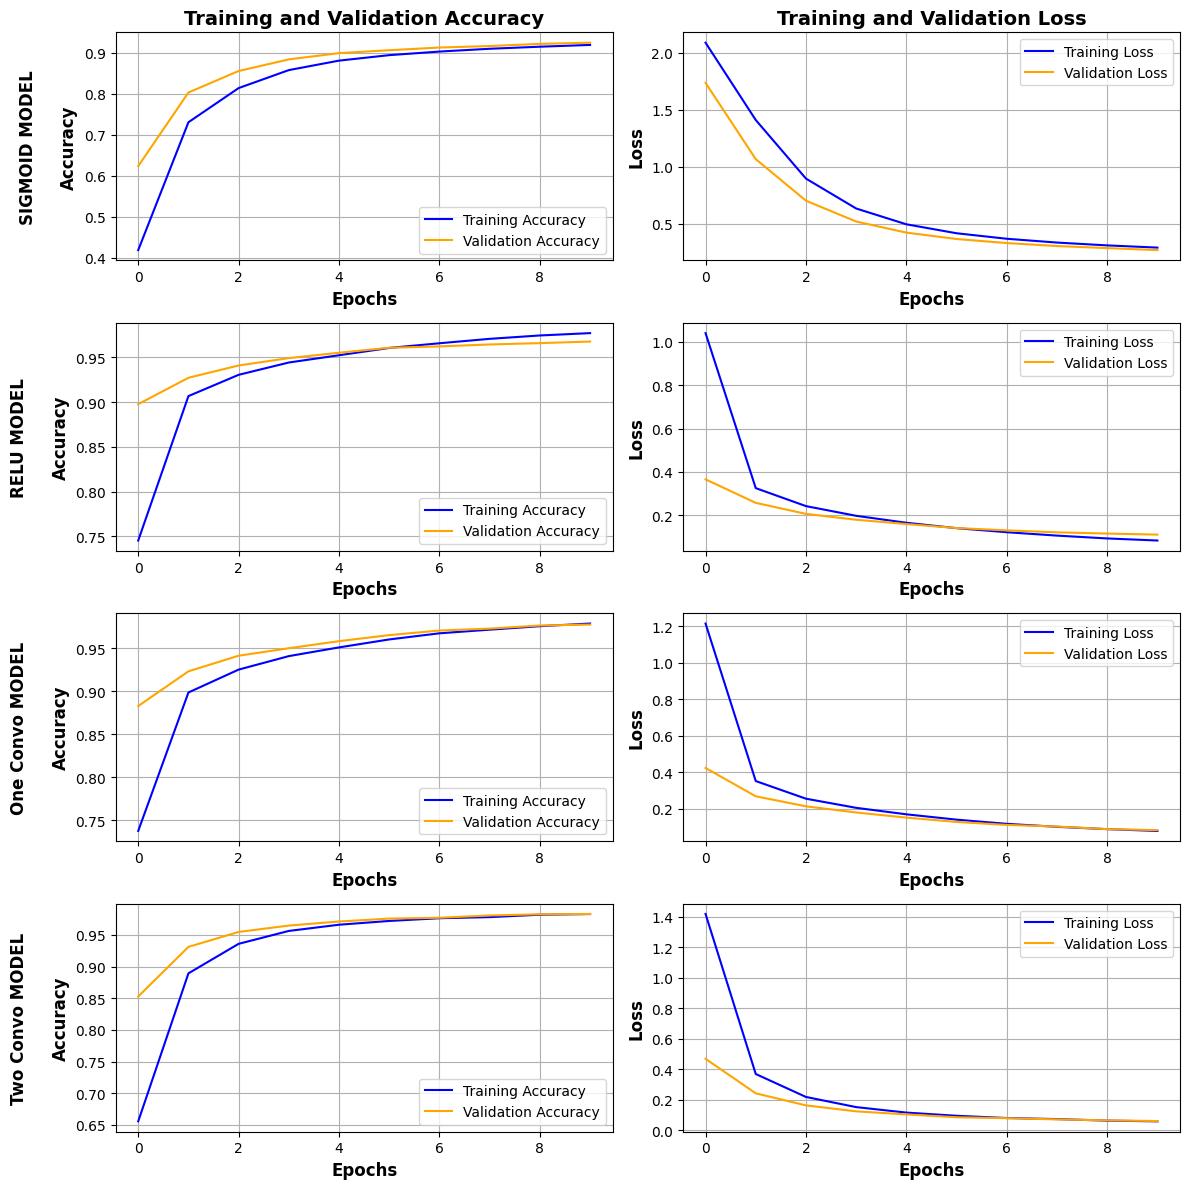

In [57]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'],
        label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14,fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('SIGMOID MODEL\n\nAccuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14,fontweight='bold')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('Loss', fontsize=12 ,fontweight='bold')
plt.legend()
plt.grid(True)


plt.tight_layout()



plt.subplot(4, 2, 3)
plt.plot(mod_relu.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod_relu.history['val_accuracy'],
        label='Validation Accuracy', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('RELU MODEL\n\nAccuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 4)
plt.plot(mod_relu.history['loss'], label='Training Loss', color='blue')
plt.plot(mod_relu.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()




plt.subplot(4, 2, 5)
plt.plot(mod_cnn.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod_cnn.history['val_accuracy'],
        label='Validation Accuracy', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('One Convo MODEL\n\nAccuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 6)
plt.plot(mod_cnn.history['loss'], label='Training Loss', color='blue')
plt.plot(mod_cnn.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.tight_layout()




plt.subplot(4, 2, 7)
plt.plot(mod_cnn2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod_cnn2.history['val_accuracy'],
        label='Validation Accuracy', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('Two Convo MODEL\n\nAccuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 8)
plt.plot(mod_cnn2.history['loss'], label='Training Loss', color='blue')
plt.plot(mod_cnn2.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12,fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()